## データの理解
### JINS MEME から得られるデータを元に、Polar H10の測定値から算出されるストレス値を予測

(データの理解)  
与えられたデータから、ストレス値についての回帰分析を行う前に、データがどのような特性があり、相関関係があるのか確認する。  

(含まれているデータの中身)  
Stress eyeMoveUp eyeMoveDown eyeMoveLeft eyeMoveRight blinkSpeed blinkStrength walking roll pitch yaw accX accY accZ

※1分間の平均値を利用  

eyeMoveUp     視線が上に動いたかどうを示す整数値  
eyeMoveDown   視線が下に動いたかどうを示す整数値  
eyeMoveLeft   視線が左に動いたかどうを示す整数値  
eyeMoveRight  視線が右に動いたかどうを示す整数値  
blinkSpeed    まばたきのスピード  
blinkStrength まばたきの強さ  
walking       かかとを地面についたどうか  

roll  姿勢を表す角度のうちロール要素を示す度  
pitch 姿勢を表す角度のうちピッチ要素を示す度  
yaw   姿勢を表す角度のうちヨー要素を示す度  
accX  加速度のX軸の値  
accY  加速度のY軸の値  
accZ  加速度のZ軸の値  

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("data/StressData.csv")

In [4]:
# データの表示(0列目にStressがある。これを予測する)
df.head()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ
0,1.5829,0.010833,0.043333,0.035833,0.035000,3.991667,2.757500,0.003333,-14.057250,67.466825,276.476133,3.562917,12.925885,-7.695000
1,1.9203,0.025833,0.049167,0.087500,0.083333,4.625000,3.173333,0.025000,-5.160117,22.682433,276.713125,1.198854,3.677865,-14.497188
2,0.5001,0.008333,0.014167,0.013333,0.013333,4.741667,3.296667,0.000000,12.649808,14.136133,63.246117,-3.840521,1.478385,-15.356875
3,1.3952,0.046667,0.057500,0.052500,0.058333,5.091667,4.399167,0.038333,-7.968200,29.484583,284.256283,1.898281,4.995260,-13.646406
4,2.2462,0.015833,0.041667,0.050000,0.068333,5.516667,3.453333,0.000833,-1.588308,9.208992,132.826758,0.100365,0.054635,-15.621458


In [5]:
# 欠損値の確認
df.isnull().sum()

Stress           0
eyeMoveUp        0
eyeMoveDown      0
eyeMoveLeft      0
eyeMoveRight     0
blinkSpeed       0
blinkStrength    0
walking          0
roll             0
pitch            0
yaw              0
accX             0
accY             0
accZ             0
dtype: int64

欠損値のあるデータがないことが分かる

In [6]:
print("データの要素数：",len(df))
print("データの形：",df.shape)

データの要素数： 1418
データの形： (1418, 14)


In [7]:
# 各データ型を表示
df.dtypes

Stress           float64
eyeMoveUp        float64
eyeMoveDown      float64
eyeMoveLeft      float64
eyeMoveRight     float64
blinkSpeed       float64
blinkStrength    float64
walking          float64
roll             float64
pitch            float64
yaw              float64
accX             float64
accY             float64
accZ             float64
dtype: object

データを組み合わせて新たに特徴量を生成する

In [8]:
# 加速度センサーを合成ベクトル(resultant vector)に変換し、追加
df.loc[:, "resultantVector"] = np.sqrt(df.loc[:,"accX"]**2 + df.loc[:,"accY"]**2+df.loc[:,"accZ"]**2)

# 眼球の動きの上下左右を加算し、eyeMoveTotalとして追加
df.loc[:, "eyeMoveTotal"] = df.loc[:,"eyeMoveUp"]+df.loc[:,"eyeMoveDown"]+df.loc[:,"eyeMoveLeft"]+df.loc[:,"eyeMoveRight"]

# 眼球の動きの上下左右を２乗平均、eyeMoveSprtとして追加
df.loc[:, "eyeMoveSqrt"] = np.sqrt(df.loc[:,"eyeMoveUp"]**2+df.loc[:,"eyeMoveDown"]**2+df.loc[:,"eyeMoveLeft"]**2+df.loc[:,"eyeMoveRight"]**2)

In [9]:
df.head(10)

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal,eyeMoveSqrt
0,1.5829,0.010833,0.043333,0.035833,0.035000,3.991667,2.757500,0.003333,-14.057250,67.466825,276.476133,3.562917,12.925885,-7.695000,15.459169,0.125000,0.067113
1,1.9203,0.025833,0.049167,0.087500,0.083333,4.625000,3.173333,0.025000,-5.160117,22.682433,276.713125,1.198854,3.677865,-14.497188,15.004412,0.245833,0.132987
2,0.5001,0.008333,0.014167,0.013333,0.013333,4.741667,3.296667,0.000000,12.649808,14.136133,63.246117,-3.840521,1.478385,-15.356875,15.898705,0.049167,0.025014
3,1.3952,0.046667,0.057500,0.052500,0.058333,5.091667,4.399167,0.038333,-7.968200,29.484583,284.256283,1.898281,4.995260,-13.646406,14.655392,0.215000,0.107903
4,2.2462,0.015833,0.041667,0.050000,0.068333,5.516667,3.453333,0.000833,-1.588308,9.208992,132.826758,0.100365,0.054635,-15.621458,15.621876,0.175833,0.095688
5,1.2826,0.025812,0.029975,0.048293,0.045795,3.572023,2.537052,0.006661,-8.829167,13.182373,268.350683,2.045119,1.024875,-14.966018,15.139834,0.149875,0.077422
6,1.4425,0.010000,0.012500,0.025833,0.020833,3.175000,2.365000,0.000000,-17.653758,53.037758,333.365742,4.616510,10.271302,-10.201719,15.194962,0.069167,0.036846
7,0.7531,0.012500,0.010000,0.020833,0.015000,2.325000,1.221667,0.000000,-24.428842,56.649100,344.583708,6.330781,10.532708,-9.726354,15.672227,0.058333,0.030254
8,2.2325,0.025021,0.040033,0.062552,0.071726,5.663053,3.491243,0.000000,-0.611668,7.138891,132.581651,-0.171758,-0.478055,-15.736291,15.744487,0.199333,0.106236
9,0.9670,0.016667,0.028333,0.040000,0.034167,1.833333,1.166667,0.000000,-10.647092,26.638450,224.388508,2.361979,5.025990,-14.835052,15.840400,0.119167,0.062032


In [10]:
# それぞれのカラムの統計情報を表示
df.describe()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal,eyeMoveSqrt
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,2.638792,0.016364,0.025187,0.032272,0.031791,2.811692,1.841522,0.002784,-5.738991,16.811046,172.404427,1.237580,2.150061,-14.755158,15.599900,0.105614,0.055660
std,0.846678,0.009683,0.016518,0.020258,0.021459,1.449037,1.033731,0.010941,7.765578,14.878837,90.085326,2.124249,3.646666,1.440293,0.619249,0.062409,0.033070
min,0.500100,0.000000,0.000000,0.000000,0.000000,0.475000,0.168333,0.000000,-41.517917,-44.191192,8.604183,-7.446458,-9.657135,-16.048947,4.028049,0.000000,0.000000
25%,1.969750,0.009174,0.013344,0.019167,0.017500,1.737587,1.074151,0.000000,-9.278939,5.144727,101.251871,0.357148,-0.800039,-15.704453,15.479626,0.062565,0.033172
50%,2.616950,0.015000,0.020833,0.027083,0.026667,2.475000,1.604002,0.000000,-6.152560,13.619896,160.631896,1.391518,1.352917,-15.181221,15.809209,0.090833,0.047412
75%,3.221725,0.021685,0.032857,0.040825,0.040833,3.597917,2.373750,0.000000,-2.540131,27.072754,253.722588,2.243394,4.916601,-14.411273,15.911195,0.130625,0.069094
max,5.808900,0.057500,0.115207,0.156667,0.222222,14.722222,8.030000,0.103333,26.634217,80.300742,354.848267,10.161771,14.162187,-3.640729,16.117218,0.405833,0.229061


In [11]:
# カラム間の相関関数を確認。
df.corr()

,Stress,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal,eyeMoveSqrt
Stress,1.000000,0.242776,0.295296,0.281635,0.316484,0.176586,0.147969,0.169881,-0.010229,0.041362,0.023041,0.017111,0.035725,0.129777,-0.161536,0.316072,0.316566
eyeMoveUp,0.242776,1.000000,0.794882,0.678283,0.649795,0.398719,0.351285,0.407347,-0.015832,0.092379,-0.022796,0.013567,0.082459,0.173098,-0.281577,0.809154,0.770292
eyeMoveDown,0.295296,0.794882,1.000000,0.795308,0.762686,0.490954,0.436192,0.534220,-0.021221,0.075056,0.020129,0.020693,0.067270,0.166727,-0.324413,0.908426,0.886726
eyeMoveLeft,0.281635,0.678283,0.795308,1.000000,0.913106,0.494415,0.451182,0.582330,-0.066266,0.074642,0.058566,0.065426,0.062897,0.111055,-0.266426,0.954323,0.958208
eyeMoveRight,0.316484,0.649795,0.762686,0.913106,1.000000,0.552639,0.480311,0.565792,-0.046125,0.067410,0.003199,0.047955,0.051913,0.114775,-0.264498,0.942941,0.960617
blinkSpeed,0.176586,0.398719,0.490954,0.494415,0.552639,1.000000,0.943240,0.461614,0.171357,0.044060,-0.024021,-0.181241,0.029371,0.229363,-0.286773,0.542327,0.556416
blinkStrength,0.147969,0.351285,0.436192,0.451182,0.480311,0.943240,1.000000,0.403490,0.198071,0.013213,0.006235,-0.207903,0.001731,0.195783,-0.254679,0.481569,0.490096
walking,0.169881,0.407347,0.534220,0.582330,0.565792,0.461614,0.403490,1.000000,-0.023030,0.146369,0.020234,0.032398,0.139819,0.149368,-0.269205,0.588177,0.601886
roll,-0.010229,-0.015832,-0.021221,-0.066266,-0.046125,0.171357,0.198071,-0.023030,1.000000,-0.291942,-0.086613,-0.996761,-0.282416,-0.262881,0.019951,-0.045444,-0.045055
pitch,0.041362,0.092379,0.075056,0.074642,0.067410,0.044060,0.013213,0.146369,-0.291942,1.000000,0.002192,0.296154,0.982966,0.719591,-0.125022,0.081607,0.079656


In [12]:
df_data = df.drop(columns=['Stress'])

In [18]:
df_mixmax_normalization = df_data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [19]:
df_mixmax_normalization.head(10)

,eyeMoveUp,eyeMoveDown,eyeMoveLeft,eyeMoveRight,blinkSpeed,blinkStrength,walking,roll,pitch,yaw,accX,accY,accZ,resultantVector,eyeMoveTotal,eyeMoveSqrt
0,0.188406,0.376133,0.228723,0.157500,0.246832,0.329341,0.032258,0.402932,0.896910,0.773651,0.625240,0.948097,0.673259,0.945567,0.308008,0.292992
1,0.449275,0.426767,0.558511,0.375000,0.291285,0.382234,0.241935,0.533480,0.537172,0.774335,0.490981,0.559840,0.125059,0.907950,0.605749,0.580571
2,0.144928,0.122967,0.085106,0.060000,0.299474,0.397922,0.000000,0.794806,0.468523,0.157813,0.204787,0.467499,0.055775,0.981925,0.121150,0.109202
3,0.811594,0.499100,0.335106,0.262500,0.324040,0.538160,0.370968,0.492277,0.591812,0.796121,0.530703,0.615147,0.193625,0.879080,0.529774,0.471066
4,0.275362,0.361667,0.319149,0.307500,0.353870,0.417850,0.008061,0.585889,0.428945,0.358772,0.428596,0.407727,0.034452,0.959026,0.433265,0.417741
5,0.448901,0.260183,0.308254,0.206078,0.217377,0.301300,0.064462,0.479644,0.460862,0.750183,0.539042,0.448460,0.087275,0.919152,0.369302,0.337997
6,0.173913,0.108500,0.164894,0.093750,0.189511,0.279415,0.000000,0.350160,0.781006,0.937956,0.685076,0.836650,0.471238,0.923712,0.170431,0.160857
7,0.217391,0.086800,0.132979,0.067500,0.129850,0.133983,0.000000,0.250749,0.810015,0.970355,0.782432,0.847625,0.509549,0.963191,0.143737,0.132076
8,0.435145,0.347490,0.399269,0.322769,0.364145,0.422672,0.000000,0.600220,0.412317,0.358064,0.413142,0.385363,0.025198,0.969168,0.491169,0.463790
9,0.289855,0.245933,0.255319,0.153750,0.095340,0.126987,0.000000,0.452969,0.568950,0.623214,0.557037,0.616438,0.097830,0.977102,0.293634,0.270808


上記の相関関係の表からも、Stress値と強い相関関係にあるパラメータはないことが分かった。

In [20]:
%matplotlib inline
from pandas.plotting import scatter_matrix

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


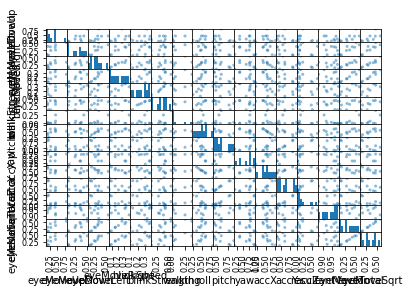

In [22]:
_ = scatter_matrix(df_mixmax_normalization.head(10))

## fig, ax = plt.subplots()

x = df_sort['blinkStrength']
y = df_sort['Stress']

ax.set_xlabel('blinkStrength')
ax.set_ylabel('Stress')
ax.scatter(x,y)

plt.show()

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


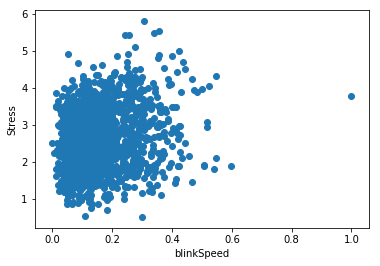

In [24]:
fig, ax = plt.subplots()

x = df_mixmax_normalization['blinkSpeed']
y = df['Stress']

ax.set_xlabel('blinkSpeed')
ax.set_ylabel('Stress')
ax.scatter(x,y)

plt.show()

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


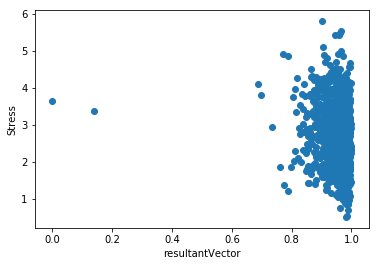

In [25]:
fig_v, ax_v = plt.subplots()

x = df_mixmax_normalization['resultantVector']
y = df['Stress']

ax_v.set_xlabel('resultantVector')
ax_v.set_ylabel('Stress')
ax_v.scatter(x,y)

plt.show()

In [26]:
df_stress=df['Stress']

In [27]:
df_stress.head()

0    1.5829
1    1.9203
2    0.5001
3    1.3952
4    2.2462
Name: Stress, dtype: float64

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


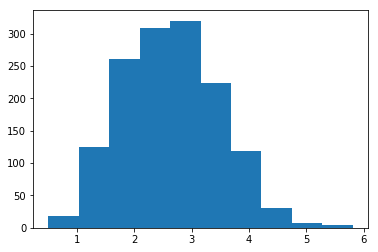

In [28]:
fig_hist, ax_hist = plt.subplots() 
n,bins, patches = ax_hist.hist(df['Stress'])
plt.show()

histメソッドは返り血として度数分布表に使用できるデータを返す  
n:各ビン(棒)の度数(要素数)が格納  
bins:ビンの境界の値  
patches:ビンを描画するための情報  

In [29]:
print("n:", n)
print("bins:", bins)
print("patches:", patches)

n: [ 19. 125. 261. 308. 320. 223. 118.  31.   8.   5.]
bins: [0.5001  1.03098 1.56186 2.09274 2.62362 3.1545  3.68538 4.21626 4.74714
 5.27802 5.8089 ]
patches: <a list of 10 Patch objects>


In [30]:
for i, num in enumerate(n):
    print('{:.2f} - {:.2f}: {}'.format(bins[i], bins[i+1], num))

0.50 - 1.03: 19.0
1.03 - 1.56: 125.0
1.56 - 2.09: 261.0
2.09 - 2.62: 308.0
2.62 - 3.15: 320.0
3.15 - 3.69: 223.0
3.69 - 4.22: 118.0
4.22 - 4.75: 31.0
4.75 - 5.28: 8.0
5.28 - 5.81: 5.0


/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


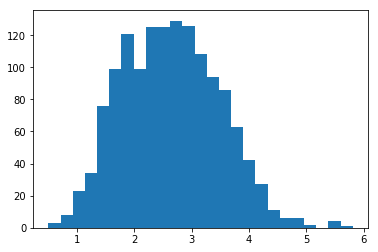

In [31]:
fig_hist2, ax_hist2 = plt.subplots()
ax_hist2.hist(df['Stress'], bins=25)
plt.show()

In [32]:
# 平均値
df['Stress'].mean()

2.6387922425952093

In [33]:
# 標準偏差
df['Stress'].std()

0.8466778625665402

In [34]:
# 中央値
df['Stress'].median()

2.61695

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


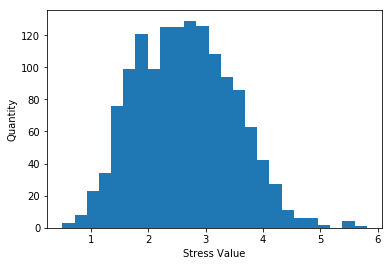

In [38]:
fig_hist2, ax_hist2 = plt.subplots()

# 正規分布のデータを作成(平均：Stressデータの平均、標準偏差：Stressデータの標準偏差、サイズ：Stress配列を同じ数字)
np.random.seed(123)
mu = df['Stress'].mean()
std = df['Stress'].std()
x_gen = np.random.normal(
    loc   = mu,      # 平均
    scale = std,      # 標準偏差
    size  = 1417,    # 出力配列のサイズ(タプルも可)
)

# Stressデータと、生成した正規分布データをプロット
ax_hist2.hist((df['Stress']), bins=25)
# ax_hist2.plot(x_gen,'r-')
ax_hist2.set_xlabel('Stress Value')
ax_hist2.set_ylabel('Quantity')

plt.show()

データとして使用しているStress値については、正規分布に近い分布を取っていることが分かる。

/Users/hiromasa-t/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


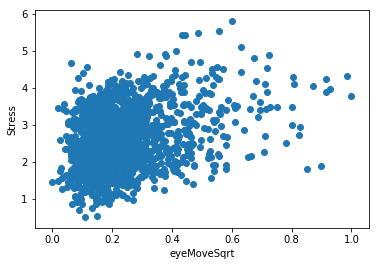

In [40]:
fig_eyeMoveSqrt, ax_eyeMoveSqrt = plt.subplots()

x_eyeMoveSqrt = df_mixmax_normalization['eyeMoveSqrt']
y_eyeMoveSqrt = df['Stress']

ax_eyeMoveSqrt.set_xlabel('eyeMoveSqrt')
ax_eyeMoveSqrt.set_ylabel('Stress')
ax_eyeMoveSqrt.scatter(x_eyeMoveSqrt,y_eyeMoveSqrt)

plt.show()